## Tools

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

## Dataset

In [16]:
data = pd.read_csv("emails_train.csv")
data


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,Email 3994,0,2,1,1,0,1,14,0,0,...,0,0,0,0,0,0,0,0,0,1
3994,Email 3995,18,8,1,5,3,1,81,0,1,...,0,0,0,0,0,0,0,0,0,0
3995,Email 3996,6,3,15,2,7,1,67,4,6,...,0,0,0,0,0,0,0,2,0,0
3996,Email 3997,4,1,4,4,2,0,26,2,2,...,0,0,0,0,0,0,0,0,0,0


## Basic EDA

<AxesSubplot:>

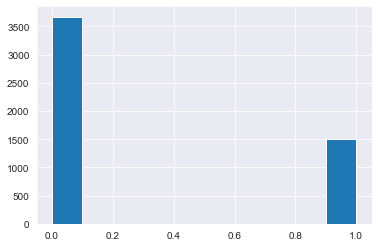

In [3]:
data["Prediction"].hist()

<AxesSubplot:>

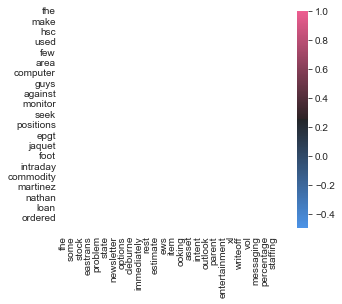

In [4]:
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

## Calculate P(Y=y) for all possible y

In [5]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

## Approach 1: Calculate P(X=x|Y=y) using Gaussian dist.

In [6]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

## Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum

In [7]:
def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

## Test Gaussian model

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="Prediction")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

TypeError: Could not convert Email 2427Email 16Email 4594Email 3044Email 2974Email 3825Email 2976Email 1460Email 1804Email 3429Email 2139Email 1914Email 1731Email 2676Email 5097Email 2866Email 3351Email 2228Email 3705Email 4396Email 3652Email 4767Email 66Email 1252Email 2279Email 4563Email 5008Email 3795Email 5116Email 3522Email 3577Email 2141Email 525Email 2958Email 180Email 1398Email 2842Email 3719Email 4167Email 2930Email 33Email 137Email 2994Email 5086Email 3829Email 3889Email 1653Email 2964Email 4106Email 3909Email 2797Email 4416Email 558Email 2559Email 1977Email 5025Email 60Email 1071Email 3771Email 259Email 2341Email 4873Email 318Email 4540Email 2639Email 353Email 2413Email 3017Email 2380Email 1419Email 3404Email 3873Email 1311Email 422Email 1162Email 3823Email 4269Email 4371Email 1987Email 4867Email 3922Email 1068Email 2321Email 1665Email 316Email 3685Email 3283Email 1125Email 2542Email 4831Email 3450Email 2659Email 4574Email 3021Email 1597Email 4694Email 4769Email 294Email 345Email 358Email 4448Email 2772Email 2336Email 1864Email 1267Email 1995Email 4699Email 4234Email 3411Email 826Email 3473Email 2928Email 4129Email 3722Email 2632Email 4875Email 136Email 605Email 3506Email 1860Email 2931Email 2244Email 3866Email 2038Email 978Email 4143Email 4256Email 3519Email 4580Email 3316Email 5109Email 609Email 3991Email 1709Email 2992Email 301Email 198Email 1187Email 2439Email 2276Email 3246Email 3300Email 2588Email 3518Email 2284Email 4809Email 3914Email 4418Email 2057Email 2264Email 2013Email 2330Email 5074Email 4499Email 1330Email 354Email 584Email 728Email 2397Email 2740Email 5077Email 336Email 2679Email 3488Email 2935Email 2316Email 3974Email 3906Email 2725Email 2949Email 2137Email 1988Email 623Email 2016Email 3805Email 1506Email 1120Email 1982Email 2641Email 2921Email 5037Email 1831Email 4929Email 916Email 2360Email 5133Email 2850Email 2601Email 1714Email 5152Email 923Email 3360Email 2727Email 2643Email 831Email 3989Email 1349Email 1175Email 304Email 3034Email 1974Email 631Email 1025Email 927Email 2608Email 2700Email 3100Email 2305Email 2823Email 3549Email 369Email 1335Email 2425Email 5038Email 958Email 4521Email 3967Email 4390Email 4957Email 2329Email 4012Email 76Email 4008Email 1238Email 5104Email 680Email 1702Email 698Email 4879Email 3368Email 3417Email 2093Email 3337Email 1682Email 4368Email 872Email 5046Email 3280Email 4364Email 2878Email 1047Email 3310Email 2766Email 539Email 2253Email 2385Email 2361Email 1562Email 617Email 2070Email 188Email 1901Email 140Email 4588Email 729Email 4408Email 2126Email 2436Email 4776Email 3464Email 3409Email 4388Email 3014Email 3763Email 1585Email 4987Email 3366Email 1103Email 4967Email 4826Email 2635Email 749Email 524Email 3298Email 772Email 1997Email 3022Email 4928Email 1909Email 4711Email 4216Email 4759Email 579Email 230Email 1021Email 3250Email 2661Email 4073Email 1896Email 1314Email 3075Email 4393Email 5098Email 215Email 1000Email 3356Email 2606Email 4719Email 813Email 3589Email 1332Email 1229Email 4401Email 2190Email 1770Email 3663Email 655Email 3066Email 3692Email 4868Email 590Email 1560Email 2691Email 227Email 4899Email 2793Email 2838Email 1680Email 1152Email 1039Email 3363Email 2020Email 1537Email 255Email 3462Email 393Email 375Email 2205Email 3701Email 1885Email 1699Email 603Email 2862Email 2015Email 4108Email 1634Email 1431Email 3778Email 1721Email 1895Email 1312Email 1072Email 12Email 3470Email 4462Email 91Email 2911Email 1601Email 4349Email 2434Email 2703Email 541Email 5014Email 2320Email 1611Email 2748Email 864Email 166Email 3418Email 4205Email 551Email 1377Email 2998Email 536Email 2543Email 1815Email 4436Email 1386Email 1478Email 481Email 610Email 4921Email 624Email 5165Email 2665Email 2768Email 1814Email 3232Email 2624Email 3706Email 956Email 483Email 3733Email 2161Email 1781Email 2847Email 3503Email 1358Email 5131Email 3807Email 273Email 4956Email 2558Email 4460Email 1376Email 1539Email 2344Email 5075Email 1262Email 4889Email 3764Email 679Email 2991Email 441Email 4300Email 2760Email 2891Email 4702Email 3860Email 83Email 3509Email 1522Email 106Email 1276Email 1337Email 363Email 3718Email 2589Email 2063Email 4670Email 3951Email 3975Email 1833Email 1062Email 5162Email 2871Email 2463Email 3521Email 1294Email 2058Email 3425Email 4961Email 4322Email 3653Email 4832Email 845Email 2531Email 4662Email 3638Email 1360Email 399Email 2095Email 2135Email 1256Email 3117Email 4970Email 1551Email 3412Email 4863Email 553Email 2663Email 4565Email 909Email 4575Email 3636Email 901Email 649Email 2001Email 2392Email 2754Email 5069Email 3102Email 78Email 4214Email 1250Email 2799Email 4861Email 549Email 1849Email 2950Email 4312Email 2422Email 2835Email 2696Email 1075Email 163Email 3046Email 3376Email 4633Email 86Email 876Email 1246Email 2200Email 4319Email 1389Email 3051Email 921Email 263Email 3292Email 1561Email 4744Email 2908Email 1934Email 1274Email 2519Email 3277Email 3575Email 2476Email 4556Email 4630Email 1578Email 4103Email 2448Email 2849Email 4410Email 2011Email 738Email 532Email 4628Email 1703Email 4235Email 819Email 1161Email 262Email 4930Email 2774Email 4656Email 1480Email 1564Email 1916Email 5108Email 4139Email 2396Email 1856Email 1163Email 2619Email 3835Email 1762Email 3174Email 1441Email 917Email 1237Email 3586Email 3772Email 2072Email 63Email 1892Email 587Email 3810Email 599Email 4948Email 3025Email 1287Email 4429Email 1532Email 4705Email 3594Email 1571Email 3535Email 1418Email 244Email 1719Email 1122Email 1883Email 1227Email 3865Email 1198Email 3840Email 3613Email 1991Email 2576Email 714Email 4180Email 1279Email 1530Email 744Email 57Email 3553Email 1385Email 1220Email 4013Email 3863Email 4506Email 1070Email 4709Email 1608Email 3088Email 113Email 101Email 3402Email 4572Email 4150Email 1084Email 129Email 2019Email 4192Email 1688Email 210Email 4903Email 4646Email 1566Email 2504Email 3939Email 2541Email 2777Email 3331Email 3309Email 807Email 1209Email 4223Email 2868Email 2636Email 1325Email 4072Email 3305Email 2556Email 5023Email 1086Email 467Email 3339Email 2286Email 5076Email 892Email 1390Email 1764Email 1448Email 3469Email 1779Email 1567Email 1067Email 2986Email 2456Email 4816Email 3665Email 2753Email 5024Email 4559Email 4651Email 4942Email 4290Email 50Email 1022Email 606Email 4202Email 2577Email 906Email 4853Email 3003Email 1091Email 915Email 1955Email 757Email 4710Email 808Email 5118Email 685Email 2191Email 2032Email 2332Email 1573Email 2351Email 2820Email 1374Email 1355Email 648Email 3892Email 4316Email 2712Email 818Email 2873Email 436Email 205Email 2834Email 925Email 4669Email 1644Email 5012Email 3286Email 1865Email 2261Email 3565Email 748Email 1060Email 1001Email 4846Email 1132Email 1240Email 3552Email 4246Email 2892Email 1383Email 2708Email 3215Email 4171Email 879Email 882Email 2252Email 509Email 9Email 3786Email 4842Email 591Email 1609Email 2693Email 1488Email 4811Email 4503Email 1943Email 4553Email 51Email 3444Email 2800Email 2513Email 2134Email 4295Email 715Email 4926Email 691Email 602Email 1056Email 1017Email 3097Email 3794Email 4341Email 1321Email 719Email 1215Email 3588Email 1222Email 3220Email 1580Email 583Email 1051Email 4686Email 2599Email 237Email 56Email 4023Email 947Email 4638Email 3256Email 2214Email 3520Email 1110Email 3545Email 5035Email 5120Email 4616Email 3901Email 23Email 683Email 1646Email 565Email 1412Email 161Email 1375Email 2159Email 2516Email 4391Email 3094Email 4693Email 1989Email 2166Email 1971Email 4149Email 3937Email 2671Email 3407Email 4217Email 3104Email 3995Email 1589Email 261Email 2335Email 4043Email 443Email 1381Email 4265Email 366Email 3192Email 3011Email 309Email 1788Email 4413Email 2521Email 3996Email 2765Email 2789Email 3861Email 28Email 4062Email 898Email 2142Email 1841Email 912Email 4458Email 4327Email 2050Email 139Email 4773Email 2037Email 2977Email 1590Email 3684Email 677Email 1158Email 853Email 756Email 3599Email 869Email 550Email 2235Email 3056Email 2308Email 4909Email 4444Email 305Email 2501Email 2046Email 4064Email 1498Email 3374Email 1304Email 1484Email 3327Email 5082Email 4358Email 526Email 2405Email 1334Email 3622Email 2595Email 4376Email 4189Email 2534Email 317Email 3569Email 4367Email 3851Email 4561Email 2919Email 4297Email 4369Email 1902Email 999Email 4874Email 1761Email 4683Email 284Email 2297Email 4590Email 3745Email 3581Email 4090Email 2318Email 4121Email 2394Email 2012Email 2951Email 1074Email 4362Email 594Email 552Email 3617Email 3977Email 2376Email 351Email 4187Email 3365Email 4595Email 560Email 1094Email 4407Email 3886Email 2771Email 632Email 157Email 1297Email 2102Email 4536Email 3527Email 2547Email 384Email 162Email 4897Email 3242Email 3838Email 2767Email 2136Email 1155Email 1724Email 1621Email 1087Email 3197Email 613Email 4529Email 4640Email 3800Email 2294Email 3557Email 926Email 2010Email 1962Email 1329Email 877Email 1291Email 1820Email 225Email 3160Email 5080Email 3204Email 4977Email 2368Email 4649Email 4232Email 1812Email 1482Email 510Email 1861Email 3334Email 5022Email 1036Email 1368Email 1265Email 3085Email 1171Email 3440Email 1050Email 4820Email 4122Email 703Email 2089Email 4685Email 291Email 1950Email 3826Email 4937Email 1839Email 3098Email 1479Email 1953Email 1570Email 3686Email 4348Email 2181Email 4789Email 2860Email 1427Email 855Email 1593Email 4094Email 5085Email 1884Email 3386Email 3721Email 2074Email 4144Email 4876Email 3669Email 4692Email 766Email 843Email 765Email 1541Email 2506Email 3143Email 3611Email 3177Email 3437Email 453Email 4884Email 2236Email 4716Email 1255Email 4338Email 1055Email 1244Email 1235Email 1534Email 1328Email 4564Email 1097Email 2865Email 3857Email 3704Email 502Email 421Email 3720Email 3940Email 2856Email 3815Email 415Email 2811Email 3128Email 2204Email 1629Email 2221Email 4695Email 3095Email 4567Email 2465Email 2065Email 2067Email 4287Email 2806Email 1465Email 3067Email 4036Email 1655Email 386Email 919Email 4332Email 1935Email 388Email 4783Email 1797Email 4519Email 4330Email 4946Email 125Email 2569Email 752Email 537Email 4040Email 1961Email 4975Email 1983Email 4498Email 1843Email 3155Email 3369Email 1917Email 1519Email 4703Email 2742Email 3744Email 4250Email 3629Email 3593Email 600Email 1373Email 2790Email 1397Email 3578Email 4704Email 1169Email 143Email 2695Email 269Email 4264Email 4910Email 1859Email 3348Email 1234Email 3059Email 4736Email 1006Email 1106Email 3743Email 4278Email 3961Email 5156Email 708Email 3952Email 3064Email 1707Email 834Email 2004Email 3284Email 4627Email 187Email 272Email 3659Email 656Email 1963Email 4491Email 4934Email 178Email 3650Email 2130Email 3698Email 2666Email 1867Email 4901Email 1662Email 4263Email 3776Email 1145Email 1713Email 1623Email 2830Email 190Email 3625Email 85Email 654Email 3905Email 1026Email 2502Email 4828Email 2623Email 24Email 730Email 1233Email 2451Email 3234Email 2980Email 3053Email 3585Email 4151Email 2101Email 2257Email 4751Email 4346Email 1137Email 4641Email 2730Email 1894Email 2853Email 3689Email 2291Email 4516Email 3643Email 1288Email 5114Email 4245Email 4610Email 3387Email 3785Email 42Email 4176Email 4734Email 4836Email 370Email 2573Email 4998Email 1013Email 4021Email 43Email 608Email 1101Email 2586Email 1965Email 158Email 340Email 2262Email 241Email 2943Email 4925Email 14Email 326Email 475Email 265Email 497Email 4353Email 469Email 2494Email 2759Email 2897Email 2845Email 1491Email 523Email 2617Email 4965Email 3142Email 267Email 1020Email 1772Email 3296Email 1641Email 3631Email 4434Email 1744Email 4164Email 3899Email 3864Email 817Email 4635Email 4682Email 1741Email 3061Email 2170Email 2116Email 1223Email 4632Email 1726Email 837Email 4006Email 2069Email 1657Email 2469Email 3211Email 3694Email 2225Email 4089Email 2239Email 4781Email 2969Email 3106Email 4329Email 3884Email 2594Email 4764Email 3068Email 2295Email 4738Email 466Email 1900Email 10Email 4708Email 711Email 1324Email 1984Email 1921Email 3037Email 246Email 320Email 4617Email 4468Email 2387Email 413Email 3438Email 1501Email 2061Email 1737Email 841Email 1675Email 3362Email 2848Email 2128Email 3752Email 939Email 3390Email 1933Email 3263Email 3333Email 5019Email 2906Email 4770Email 1176Email 568Email 330Email 4490Email 1124Email 4331Email 2369Email 203Email 2213Email 4980Email 2378Email 2804Email 3696Email 472Email 809Email 768Email 429Email 5000Email 4027Email 2757Email 274Email 4296Email 2278Email 2607Email 2780Email 4663Email 3196Email 285Email 81Email 35Email 3466Email 4500Email 3997Email 1443Email 955Email 1927Email 372Email 2913Email 1100Email 249Email 4527Email 3454Email 4916Email 4017Email 414Email 218Email 4544Email 1826Email 3318Email 3724Email 1584Email 2963Email 3655Email 1521Email 3062Email 4433Email 2124Email 1946Email 1188Email 4081Email 4343Email 2260Email 1614Email 2925Email 4949Email 2103Email 1007Email 409Email 4758Email 4028Email 124Email 1159Email 563Email 1687Email 4147Email 1481Email 2133Email 1339Email 4156Email 653Email 2114Email 4659Email 1408Email 3762Email 4298Email 3036Email 4282Email 1577Email 3673Email 2762Email 2267Email 3145Email 5130Email 1426Email 1886Email 5122Email 4195Email 4793Email 1925Email 2901Email 833Email 4707Email 3489Email 1259Email 2630Email 839Email 21Email 4557Email 4141Email 4785Email 3727Email 4729Email 488Email 207Email 3747Email 4052Email 793Email 2418Email 5048Email 3712Email 3434Email 1599Email 2164Email 465Email 3491Email 2220Email 4756Email 482Email 1203Email 383Email 4989Email 1512Email 2327Email 2310Email 155Email 980Email 741Email 2802Email 5172Email 5061Email 4293Email 2256Email 4539Email 1380Email 2634Email 3015Email 802Email 2487Email 4748Email 5147Email 1969Email 1651Email 3270Email 2940Email 1232Email 1147Email 5005Email 1170Email 4085Email 360Email 586Email 780Email 3477Email 5126Email 3998Email 3834Email 297Email 4005Email 1800Email 4797Email 3537Email 776Email 1034Email 2920Email 2424Email 1298Email 3446Email 4701Email 948Email 3267Email 3382Email 154Email 3340Email 713Email 302Email 3264Email 1392Email 1401Email 4798Email 3876Email 979Email 778Email 2143Email 4968Email 4454Email 2936Email 2779Email 49Email 2637Email 986Email 2325Email 3380Email 646Email 4092Email 1553Email 3269Email 4461Email 213Email 4752Email 3759Email 601Email 2687Email 4194Email 1201Email 1447Email 4902Email 3414Email 2189Email 965Email 3Email 1636Email 3920Email 4024Email 4182Email 3798Email 988Email 4117Email 1357Email 4869Email 3980Email 1035Email 3902Email 283Email 1956Email 1880Email 2003Email 1348Email 1938Email 1951Email 1129Email 2326Email 3461Email 2841Email 478Email 790Email 3244Email 1807Email 1257Email 2193Email 4400Email 1248Email 5144Email 3122Email 2314Email 3852Email 4056Email 2088Email 408Email 3158Email 2879Email 4084Email 5088Email 1116Email 4425Email 4177Email 3202Email 781Email 1088Email 4015Email 2303Email 4791Email 3630Email 902Email 2099Email 4114Email 4496Email 2041Email 2160Email 182Email 4535Email 194Email 1695Email 3063Email 2363Email 3492Email 1554Email 3648Email 335Email 397Email 4914Email 4126Email 1403Email 875Email 1320Email 2346Email 3831Email 629Email 4941Email 500Email 368Email 2732Email 3971Email 2432Email 607Email 4443Email 2373Email 3231Email 2084Email 4248Email 3550Email 2791Email 3355Email 3736Email 361Email 1689Email 2109Email 2168Email 3423Email 3303Email 4541Email 2782Email 4587Email 5050Email 2669Email 2997Email 4244Email 3567Email 828Email 3619Email 1016Email 36Email 2507Email 3992Email 1463Email 2176Email 2183Email 970Email 2914Email 344Email 863Email 2654Email 403Email 824Email 4614Email 1616Email 1734Email 562Email 2999Email 3008Email 4765Email 2210Email 1173Email 851Email 1769Email 2138Email 2982Email 1446Email 2473Email 2039Email 1617Email 4954Email 3601Email 4088Email 1270Email 3596Email 3385Email 1582Email 120Email 4511Email 1776Email 972Email 3485Email 1746Email 4823Email 2805Email 1063Email 1251Email 4585Email 3240Email 1725Email 4466Email 4800Email 240Email 5158Email 866Email 3006Email 3957Email 4962Email 313Email 2719Email 3084Email 2503Email 3424Email 2915Email 3420Email 535Email 382Email 243Email 3080Email 400Email 604Email 3623Email 3293Email 1387Email 4477Email 419Email 4134Email 4337Email 1650Email 5111Email 2885Email 4112Email 2792Email 2068Email 2808Email 4100Email 2970Email 2902Email 1221Email 2699Email 1344Email 643Email 3790Email 1362Email 89Email 3716Email 3426Email 2509Email 2524Email 4037Email 4543Email 3125Email 2345Email 5141Email 3354Email 2090Email 1531Email 2445Email 2414Email 5004Email 4155Email 3081Email 2384Email 732Email 5092Email 2357Email 3004Email 3605Email 2313Email 720Email 4966Email 1755Email 4133Email 4997Email 2419Email 4095Email 1572Email 4807Email 4631Email 3775Email 4352Email 1079Email 896Email 186Email 1121Email 3150Email 1824Email 3431Email 4044Email 112Email 5153Email 2723Email 4050Email 4676Email 5026Email 3836Email 3662Email 983Email 1127Email 3108Email 1792Email 4522Email 716Email 1818Email 3375Email 1361Email 3308Email 2486Email 1594Email 4305Email 3120Email 2910Email 2155Email 4825Email 1751Email 798Email 4603Email 458Email 645Email 311Email 1648Email 506Email 1455Email 2274Email 1214Email 4347Email 1940Email 258Email 3410Email 4209Email 1273Email 540Email 2602Email 4888Email 281Email 1432Email 2985Email 1976Email 1217Email 4634Email 521Email 4760Email 418Email 45Email 4179Email 1303Email 3632Email 2404Email 516Email 219Email 4883Email 1667Email 2896Email 543Email 4160Email 1684Email 2482Email 3478Email 1791Email 1483Email 2706Email 2334Email 5070Email 3843Email 2485Email 4218Email 1808Email 1516Email 1134Email 3639Email 743Email 2689Email 945Email 2579Email 3482Email 2440Email 2941Email 3335Email 4000Email 823Email 3149Email 4542Email 1939Email 1543Email 4118Email 1613Email 4645Email 1160Email 380Email 3925Email 4011Email 4623Email 1157Email 1186Email 3583Email 5049Email 795Email 4644Email 1625Email 976Email 627Email 3729Email 310Email 742Email 4586Email 3134Email 2431Email 2342Email 2497Email 2571Email 126Email 4431Email 4648Email 4936Email 2352Email 2212Email 4814Email 2598Email 4029Email 2678Email 5137Email 1853Email 1429Email 461Email 1765Email 3140Email 3641Email 740Email 4231Email 2098Email 2855Email 4802Email 2532Email 1603Email 2917Email 3877Email 306Email 1930Email 2818Email 2288Email 4140Email 4271Email 365Email 3487Email 727Email 1271Email 2062Email 107Email 2350Email 5121Email 3760Email 1316Email 2761Email 5150Email 1476Email 5010Email 2246Email 3837Email 444Email 1098Email 2240Email 4162Email 3274Email 4086Email 2444Email 4439Email 4060Email 3118Email 3378Email 2657Email 3260Email 1497Email 2979Email 2989Email 3208Email 1783Email 2249Email 3401Email 3498Email 2894Email 2147Email 3984Email 3608Email 3229Email 2560Email 636Email 4679Email 3647Email 860Email 1153Email 1937Email 4673Email 1992Email 1922Email 4183Email 2337Email 5029Email 2119Email 1030Email 1685Email 4730Email 68Email 4206Email 3657Email 4871Email 2079Email 4592Email 1810Email 2743Email 1126Email 296Email 4671Email 1759Email 1947Email 5084Email 3430Email 2216Email 2043Email 1225Email 4601Email 1598Email 254Email 1637Email 1787Email 493Email 1269Email 1798Email 2107Email 181Email 783Email 2718Email 2481Email 3817Email 3566Email 2113Email 4501Email 2843Email 1302Email 1077Email 4593Email 1012Email 1652Email 2945Email 1852Email 3032Email 3958Email 3839Email 2587Email 1168Email 3320Email 3804Email 19Email 4116Email 2728Email 412Email 3109Email 1207Email 1830Email 4915Email 314Email 774Email 423Email 987Email 1370Email 2737Email 474Email 447Email 3908Email 1350Email 2474Email 3148Email 1003Email 4674Email 3445Email 4982Email 2738Email 1439Email 27Email 4918Email 1242Email 3667Email 4728Email 3932Email 3071Email 3930Email 2937Email 4399Email 3456Email 3868Email 67Email 426Email 1784Email 4840Email 1457Email 1289Email 2685Email 2169Email 3372Email 3089Email 5027Email 769Email 4365Email 440Email 1913Email 3690Email 635Email 2129Email 1466Email 446Email 4222Email 2828Email 1113Email 4435Email 3216Email 3151Email 1009Email 3560Email 5095Email 2825Email 933Email 3948Email 2584Email 1777Email 576Email 333Email 880Email 464Email 3136Email 4995Email 1045Email 1700Email 4530Email 3254Email 2880Email 2082Email 991Email 2319Email 1789Email 1202Email 3189Email 3850Email 4154Email 3233Email 2025Email 4288Email 4851Email 1494Email 3099Email 200Email 4291Email 5059Email 1029Email 3350Email 3396Email 3514Email 211Email 1979Email 1504Email 566Email 5021Email 1579Email 2801Email 3808Email 2017Email 4830Email 1477Email 4494Email 5052Email 2154Email 2893Email 2544Email 3019Email 2460Email 1410Email 4507Email 1184Email 1191Email 3227Email 4976Email 4650Email 593Email 47Email 206Email 1069Email 4272Email 4059Email 1406Email 2049Email 4775Email 121Email 4666Email 2523Email 4378Email 275Email 2903Email 2618Email 755Email 2758Email 4672Email 1264Email 4772Email 2339Email 2836Email 2237Email 3379Email 4713Email 2736Email 2996Email 4852Email 4333Email 878Email 5064Email 2927Email 406Email 2186Email 1906Email 4531Email 968Email 4203Email 4247Email 1722Email 371Email 3114Email 5094Email 1445Email 4636Email 448Email 1683Email 4157Email 981Email 1211Email 2907Email 2173Email 4960Email 4784Email 731Email 2993Email 4892Email 2563Email 2272Email 2895Email 4717Email 3163Email 3751Email 3691Email 2965Email 410Email 2349Email 4105Email 3926Email 2091Email 2593Email 1496Email 4022Email 2157Email 534Email 3935Email 4932Email 1292Email 4762Email 1538Email 145Email 982Email 4819Email 224Email 3796Email 2470Email 2331Email 1903Email 1290Email 2009Email 3297Email 2651Email 1394Email 2701Email 4688Email 3524Email 694Email 2443Email 253Email 5166Email 3508Email 508Email 5100Email 3076Email 739Email 1771Email 857Email 2343Email 5016Email 3132Email 994Email 4609Email 4153Email 1462Email 4200Email 3753Email 5142Email 959Email 2788Email 1326Email 2219Email 2704Email 3261Email 4761Email 64Email 4596Email 3345Email 1490Email 1135Email 4484Email 220Email 456Email 144Email 961Email 29Email 2174Email 1261Email 886Email 4900Email 4920Email 2202Email 3782Email 390Email 1140Email 1658Email 2355Email 3819Email 2769Email 5117Email 676Email 787Email 3326Email 2370Email 4397Email 1Email 5045Email 3832Email 3347Email 2796Email 868Email 1780Email 2372Email 2655Email 2459Email 531Email 499Email 2311Email 4069Email 2972Email 4639Email 3463Email 2600Email 513Email 4905Email 3070Email 3859Email 998Email 4212Email 1878Email 1697Email 5065Email 3546Email 4372Email 4817Email 2664Email 1194Email 4605Email 3324Email 3895Email 1782Email 2224Email 5127Email 487Email 4613Email 2379Email 908Email 4374Email 4880Email 1451Email 3439Email 3528Email 2884Email 1353Email 3047Email 4165Email 1399Email 1083Email 4452Email 4163Email 659Email 2528Email 1595Email 1354Email 3077Email 530Email 619Email 527Email 1862Email 4750Email 1990Email 3842Email 1523Email 1138Email 3501Email 3855Email 894Email 4569Email 2273Email 3212Email 374Email 3942Email 4310Email 664Email 3252Email 95Email 1108Email 4780Email 1043Email 4812Email 13Email 2851Email 1631Email 4159Email 2750Email 3127Email 1967Email 1912Email 1059Email 2125Email 1873Email 1509Email 1869Email 832Email 3816Email 2492Email 4345Email 3111Email 2934Email 960Email 1622Email 4622Email 966Email 3210Email 2613Email 1042Email 4858Email 171Email 900Email 1959Email 4837Email 3846Email 4220Email 4855Email 1546Email 489Email 3640Email 2795Email 4571Email 4865Email 669Email 930Email 2854Email 5125Email 90Email 4415Email 4591Email 3043Email 1999Email 1890Email 156Email 1468Email 2922Email 5062Email 3472Email 1151Email 704Email 3911Email 918Email 3780Email 2199Email 1875Email 785Email 3529Email 4402Email 37Email 3869Email 2694Email 3458Email 1558Email 1754Email 792Email 4315Email 4301Email 3888Email 3194Email 1285Email 280Email 1828Email 3436Email 4447Email 1768Email 1105Email 270Email 1908Email 470Email 2048Email 3198Email 1249Email 1586Email 5106Email 111Email 1411Email 3510Email 3092Email 3016Email 99Email 4457Email 2814Email 796Email 4074Email 2674Email 3249Email 4471Email 4933Email 3628Email 944Email 4336Email 430Email 1424Email 701Email 3671Email 4718Email 1664Email 1576Email 1819Email 848Email 628Email 4334Email 3416Email 2282Email 4583Email 852Email 4721Email 1767Email 507Email 885Email 5067Email 2776Email 1550Email 3344Email 1210Email 1524Email 564Email 2863Email 476Email 1102Email 3290Email 2564Email 3559Email 2592Email 3683Email 329Email 3295Email 2121Email 2328Email 133Email 2196Email 4267Email 252Email 3493Email 5168Email 4351Email 4857Email 4046Email 873Email 450Email 4058Email 4071Email 165Email 856Email 437Email 245Email 1698Email 2446Email 4404Email 4237Email 4786Email 1605Email 1840Email 1835Email 3101Email 4258Email 3206Email 822Email 109Email 614Email 1583Email 5040Email 4626Email 3616Email 1263Email 1111Email 2395Email 2438Email 597Email 3755Email 4032Email 3045Email 468Email 3678Email 2898Email 1331Email 1461Email 15Email 2553Email 4228Email 3878Email 689Email 2650Email 1673Email 5013Email 4002Email 3978Email 1518Email 3777Email 4335Email 1470Email 2510Email 5135Email 4181Email 1871Email 5169Email 185Email 2324Email 3370Email 1994Email 652Email 3329Email 4742Email 293Email 1610Email 5159Email 1054Email 1542Email 4Email 2952Email 3713Email 804Email 2864Email 3171Email 4169Email 801Email 2499Email 3135Email 4515Email 4723Email 2232Email 2259Email 5001Email 4896Email 3447Email 2717Email 471Email 1929Email 2773Email 2066Email 3325Email 208Email 350Email 1600Email 1659Email 3993Email 457Email 3903Email 3765Email 1832Email 5129Email 3507Email 736Email 2620Email 4066Email 4146Email 2366Email 2145Email 4667Email 1676Email 3516Email 1793Email 3086Email 2816Email 1064Email 3544Email 2609Email 4386Email 119Email 2292Email 1817Email 4844Email 1677Email 1729Email 1118Email 2839Email 4324Email 570Email 276Email 4465Email 2582Email 2177Email 800Email 3282Email 3606Email 618Email 1281Email 2881Email 1857Email 1591Email 1425Email 2846Email 2537Email 1931Email 2411Email 229Email 2027Email 5140Email 292Email 2388Email 3317Email 3943Email 3603Email 2131Email 1924Email 3224Email 3525Email 3129Email 411Email 996Email 911Email 2031Email 2477Email 3749Email 2429Email 2035Email 3381Email 1089Email 4945Email 1493Email 4184Email 690Email 3758Email 3500Email 1407Email 4681Email 3612Email 993Email 1010Email 4618Email 3389Email 4213Email 4280Email 4555Email 3041Email 271Email 1382Email 118Email 1150Email 1139Email 2545Email 3919Email 4700Email 2858Email 4010Email 460Email 1366Email 3898Email 3186Email 1032Email 221Email 4361Email 4768Email 3824Email 4480Email 639Email 2962Email 1456Email 3561Email 2162Email 3715Email 3784Email 3314Email 4354Email 201Email 4294Email 2591Email 2076Email 3480Email 2022Email 3403Email 222Email 4788Email 5091Email 479Email 2118Email 1528Email 2251Email 3276Email 146Email 1802Email 2710Email 2616Email 2633Email 2973Email 77Email 3539Email 3742Email 4138Email 87Email 2990Email 1526Email 356Email 2745Email 514Email 3311Email 4849Email 2924Email 2493Email 4660Email 2034Email 2197Email 2356Email 132Email 2104Email 232Email 777Email 503Email 2875Email 929Email 4125Email 3916Email 4959Email 4972Email 3359Email 1502Email 1919Email 486Email 74Email 1692Email 2323Email 4438Email 3907Email 2056Email 34Email 949Email 39Email 4986Email 3697Email 5041Email 1197Email 696Email 5073Email 2461Email 700Email 3739Email 3670Email 4313Email 2149Email 1109Email 1738Email 518Email 31Email 2467Email 4131Email 3490Email 3209Email 3809Email 2386Email 884Email 4281Email 3676Email 404Email 3702Email 3119Email 3187Email 3185Email 990Email 1552Email 2289Email 4003Email 3738Email 1527Email 97Email 1592Email 3030Email 279Email 2872Email 1058Email 2729Email 2690Email 4185Email 2672Email 338Email 4302Email 177Email 4661Email 3307Email 3182Email 2178Email 1485Email 2184Email 3451Email 3341Email 321Email 2441Email 4608Email 1548Email 1299Email 3853Email 2266Email 2614Email 4261Email 964Email 2565Email 3154Email 662Email 2150Email 3882Email 2208Email 4168Email 2947Email 3833Email 753Email 4690Email 1342Email 2817Email 44Email 7Email 4534Email 1964Email 1696Email 4257Email 546Email 2306Email 1440Email 1923Email 1359Email 164Email 1172Email 3791Email 4268Email 4599Email 989Email 1555Email 376Email 3007Email 1090Email 2578Email 1345Email 3152Email 2844Email 4275Email 2916Email 3972Email 2312Email 1866Email 3986Email 442Email 1434Email 3592Email 1136Email 2299Email 2390Email 98Email 3538Email 1907Email 1315Email 4054Email 1395Email 1379Email 2152Email 2450Email 3633Email 4523Email 4174Email 1449Email 3200Email 175Email 435Email 638Email 904Email 4974Email 3761Email 1888Email 2053Email 3251Email 1296Email 725Email 642Email 4923Email 2151Email 3147Email 3253Email 278Email 2238Email 3679Email 5093Email 5015Email 3710Email 3078Email 3699Email 4173Email 2876Email 675Email 1556Email 4406Email 4893Email 123Email 4573Email 4276Email 5054Email 3157Email 3057Email 2489Email 4379Email 4504Email 322Email 3981Email 932 to numeric

## Convert continuous features to Categorical features

In [11]:
data["cat_mean_radius"] = pd.cut(data["mean_radius"].values, bins = 3, labels = [0,1,2])
data["cat_mean_texture"] = pd.cut(data["mean_texture"].values, bins = 3, labels = [0,1,2])
data["cat_mean_smoothness"] = pd.cut(data["mean_smoothness"].values, bins = 3, labels = [0,1,2])

data = data.drop(columns=["mean_radius", "mean_texture", "mean_smoothness"])
data = data[["cat_mean_radius",	"cat_mean_texture",	"cat_mean_smoothness", "diagnosis"]]
data.head(10)

,cat_mean_radius,cat_mean_texture,cat_mean_smoothness,diagnosis
0,1,0,1,0
1,1,0,0,0
2,1,1,1,0
3,0,1,2,0
4,1,0,1,0
5,0,0,2,0
6,1,1,1,0
7,0,1,1,0
8,0,1,2,0
9,0,1,1,0


## Approach 2: Calculate P(X=x|Y=y) categorically

In [10]:
def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    p_x_given_y = len(df[df[feat_name]==feat_val]) / len(df)
    return p_x_given_y

## Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum

In [11]:
def naive_bayes_categorical(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_categorical(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

## Test Categorical model

In [14]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_categorical(train, X=X_test, Y="Prediction")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

KeyboardInterrupt: 